In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.479590,-0.055473,1
117952,1.090346,-0.036776,1
42613,-0.061319,0.245724,1
43567,-0.548219,0.040475,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.201013,-0.113411,1
54412,-0.208323,0.096975,1
50632,-0.115735,-0.066156,1
89251,-0.534005,-0.094920,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
# Random shuffle training data
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 100: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 2s 12us/step - loss: 0.1127 - accuracy: 0.6355 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 1s 8us/step - loss: 0.0146 - accuracy: 0.8255 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 1s 8us/step - loss: 0.0111 - accuracy: 0.8646 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 1s 8us/step - loss: 0.0093 - accuracy: 0.8869 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 1s 8us/step - loss: 0.0080 - accuracy: 0.9003 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 1s 8us/step - loss: 0.0072 - accuracy: 0.9067 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [===========================

174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9478 - val_loss: 4.4593e-04 - val_accuracy: 1.0000
Epoch 55/100
174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9469 - val_loss: 4.1846e-04 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9475 - val_loss: 3.9727e-04 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9466 - val_loss: 4.0498e-04 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9478 - val_loss: 4.2149e-04 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 2s 14us/step - loss: 0.0023 - accuracy: 0.9475 - val_loss: 3.7830e-04 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 2s 14us/step - loss: 

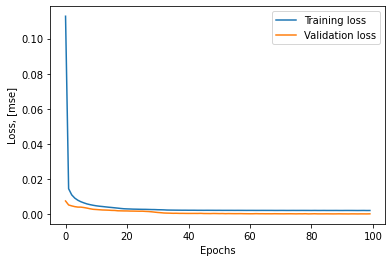

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

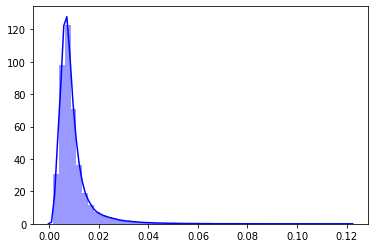

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
#g.set(xlim=(0.10,0.1), ylim=(0, 1))
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.009352997367852726

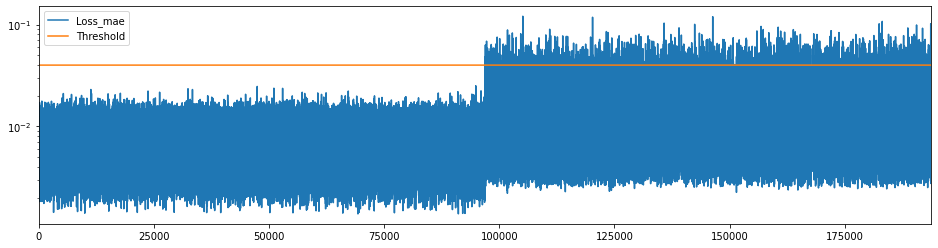

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.004423,0.04,False
1,0.008626,0.04,False
2,0.006457,0.04,False
3,0.004704,0.04,False
4,0.004441,0.04,False
...,...,...,...
193843,0.010356,0.04,False
193844,0.017963,0.04,False
193845,0.009636,0.04,False
193846,0.010537,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96976   0.048577       0.04     True
96990   0.063043       0.04     True
97000   0.044429       0.04     True
97037   0.043004       0.04     True
97103   0.040753       0.04     True
...          ...        ...      ...
193628  0.062597       0.04     True
193682  0.102004       0.04     True
193687  0.053337       0.04     True
193763  0.058010       0.04     True
193765  0.051755       0.04     True

[1630 rows x 3 columns]
(1630, 3)


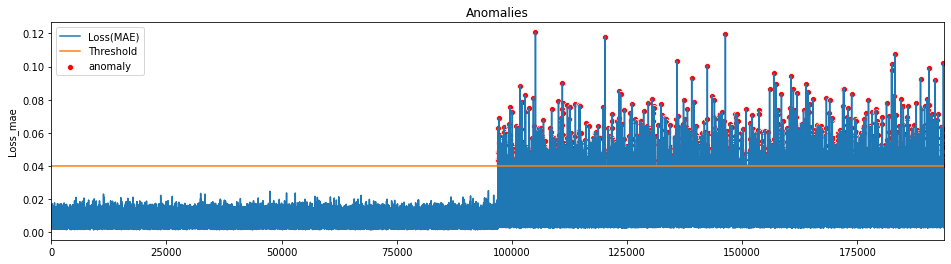

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 3s 60us/step


[0.00018709944360029843, 0.9474020600318909]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

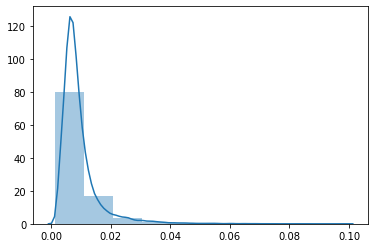

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
#g.set(xlim=(1,1.5), ylim=(0, 0.5))
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.004017,0.04,False
1,0.004283,0.04,False
2,0.010125,0.04,False
3,0.009523,0.04,False
4,0.003654,0.04,False
...,...,...,...
48457,0.005101,0.04,False
48458,0.007052,0.04,False
48459,0.003867,0.04,False
48460,0.010649,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.009339970453443532

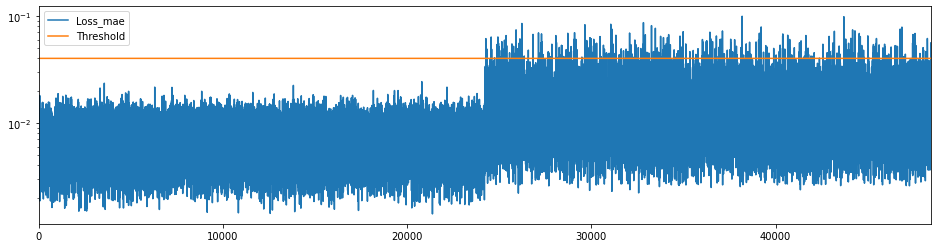

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])

In [28]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24271  0.041465       0.04     True
24273  0.061195       0.04     True
24324  0.048978       0.04     True
24333  0.040070       0.04     True
24560  0.063344       0.04     True
...         ...        ...      ...
48156  0.045431       0.04     True
48165  0.046274       0.04     True
48238  0.061363       0.04     True
48243  0.044202       0.04     True
48422  0.055840       0.04     True

[375 rows x 3 columns]
(375, 3)


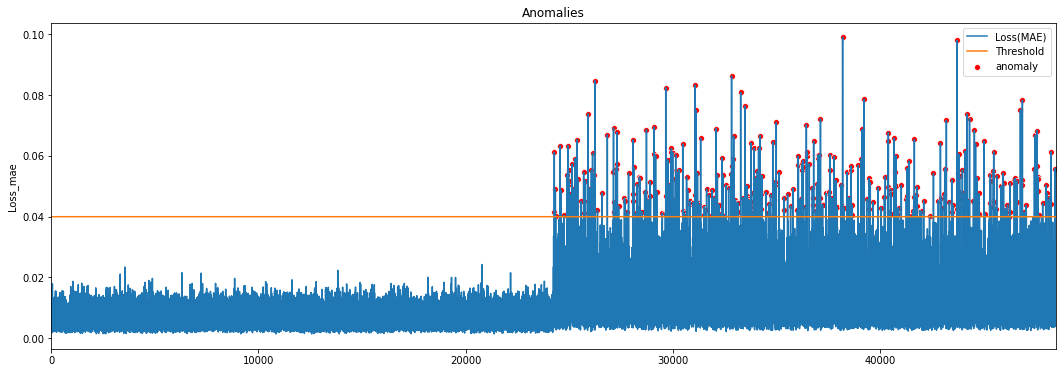

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.legend();

In [30]:
print(score[1])

0.9474020600318909


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 94.74%


In [32]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 375
